Imports

In [ ]:
from sys import exit
from sympy import symbols, diff
from package_.plots import plot_one_variable_with_range_one_points

Global variables

In [ ]:
A = 1
B = 6
EPSILON = 0.001

In [ ]:
x = symbols('x')
f = lambda x: 2 * x ** 3 + 3 * x ** 2 - 48 * x + 13 

f_1 = diff(f(x), x)
f_2 = diff(f_1, x)
f_3 = diff(f_2, x)

f_1_l = lambda x_val: f_1.evalf(subs={x: x_val})
f_2_l = lambda x_val: f_3.evalf(subs={x: x_val})

In [2]:
def bisection_method(f, epsilon, a, b):
    f_a = f(a)
    center = (a + b) / 2
    iteration = 0

    while abs(f(center)) >= epsilon:
        center = (a + b) / 2
        f_sr = f(center)
        if f_sr == 0:
            break
        elif f_sr * f_a < 0:
            b = center
        else:
            a = center
        iteration += 1

    return center, iteration

In [3]:
def statistic_method(f, f_1, f_2, epsilon, a, b):
    iteration = 0

    if f_1(a) * f_1(b) < 0 and f_2(a) * f_2(b) < 0:
        print("Warunki zbieżności nie są spełnione.")

    if f_2(a) * f(a) > 0:
        x0 = a
    else:
        x0 = b

    xn = x0
    while True:
        iteration += 1
        xni = xn - f(xn) / f_1(xn)
        if abs(f(xni)) < epsilon or abs(xni - xn) < epsilon:
            return xni, iteration
        xn = xni

In [4]:
def secant_method(f_1, f_3, epsilon, a, b):
    secantPointsArray = []
    
    if f_1(a) * f_3(a) >= 0:
        x0 = b
        x1 = a
    else:
        x0 = a
        x1 = b
    
    for _ in range(500):
        denominator = f_3(x1) - f_1(x0)
        if denominator == 0:
            break  
        x_next = x1 - f_3(x1) * (x1 - x0) / denominator
        
        secantPointsArray.append([x_next, f(x_next)])
        
        if abs(x_next - x1) < epsilon:
            break
        
        x0 = x1
        x1 = x_next
    
    return secantPointsArray

In [5]:
if f(A) * f(B) < 0:
    bisection_result, bisection_iteration = bisection_method(f, EPSILON, A, B)
    print(f"Wynik dla epsilon = {EPSILON}, na przedziale [{A}, {B}], metodą bisekcji wynosi: {bisection_result}, po {bisection_iteration} iteracjach")

    statistic_result, statistic_iteration = statistic_method(f, f_1_l, f_2_l, EPSILON, A, B)
    print(f"Wynik dla epsilon = {EPSILON}, na przedziale [{A}, {B}], metodą stycznych wynosi: {statistic_result}, po {statistic_iteration} iteracjach")

    secant_result = secant_method(f, f_2_l, EPSILON, A, B)
    print(f"Wynik dla epsilon = {EPSILON}, na przedziale [{A}, {B}], metodą siecznych wynosi: {secant_result[0][0]}, po {len(secant_result)} iteracjach")

else:
    exit("Warunek konieczny f(a) * f(b) < 0, nie został spełniony")

Wynik dla epsilon = 0.001, na przedziale [1, 6], metodą bisekcji wynosi: 4.041038513183594, po 17 iteracjach
Wynik dla epsilon = 0.001, na przedziale [1, 6], metodą stycznych wynosi: 4.04104101807113, po 4 iteracjach
Wynik dla epsilon = 0.001, na przedziale [1, 6], metodą siecznych wynosi: 4.57142857142857, po 8 iteracjach


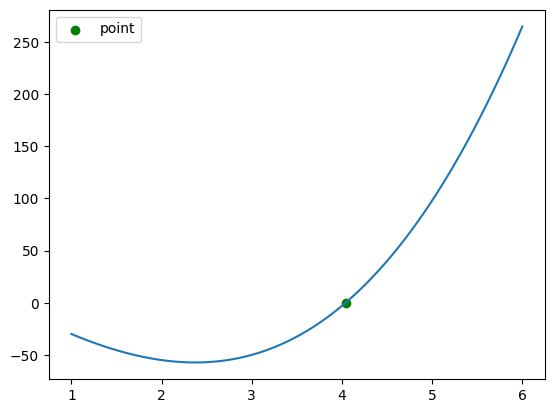

In [6]:
plot_one_variable_with_range_one_points(A, B, f, bisection_result)

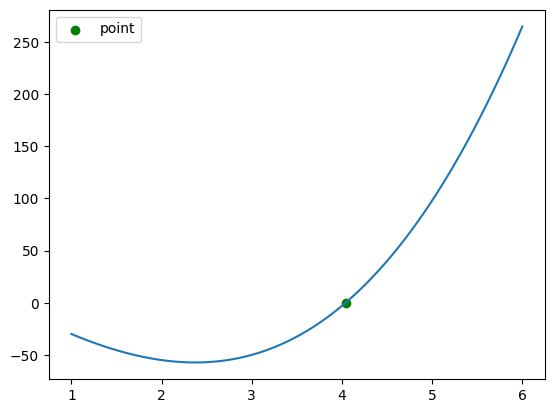

In [7]:
plot_one_variable_with_range_one_points(A, B, f, statistic_result)

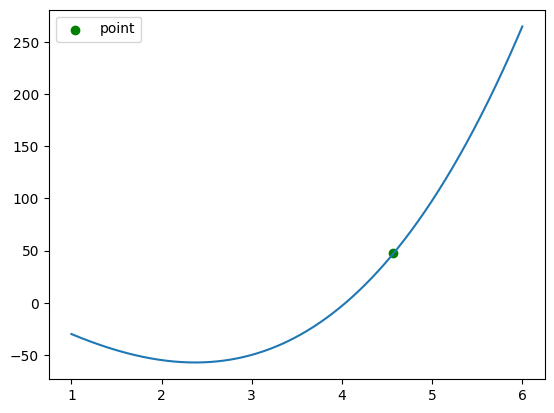

In [8]:
plot_one_variable_with_range_one_points(A, B, f, secant_result[0][0])

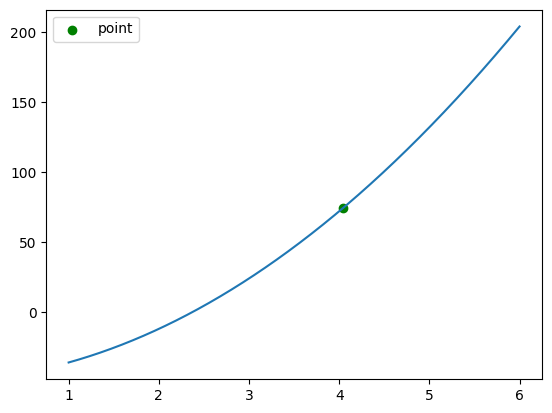

In [9]:
plot_one_variable_with_range_one_points(A, B, lambda x: 6 * x ** 2 + 6 * x - 48, bisection_result)

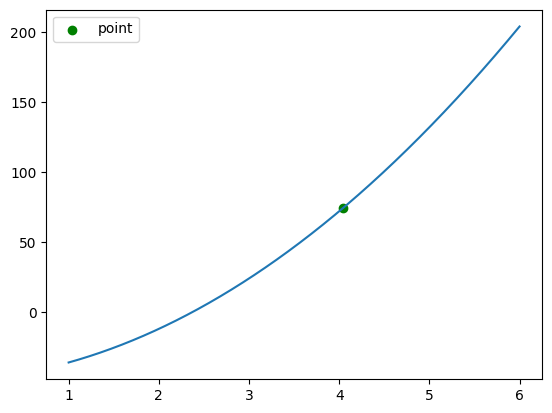

In [10]:
plot_one_variable_with_range_one_points(A, B, lambda x: 6 * x ** 2 + 6 * x - 48, statistic_result)

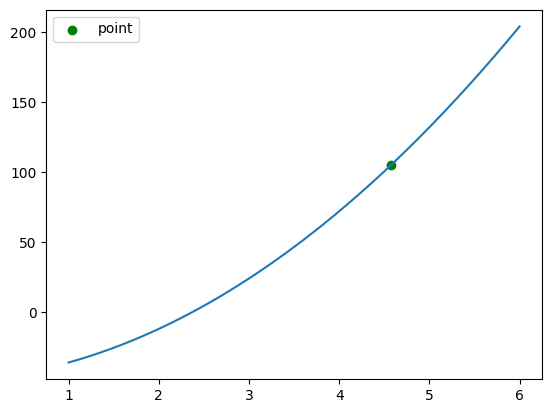

In [11]:
plot_one_variable_with_range_one_points(A, B, lambda x: 6 * x ** 2 + 6 * x - 48, secant_result[0][0])